S21

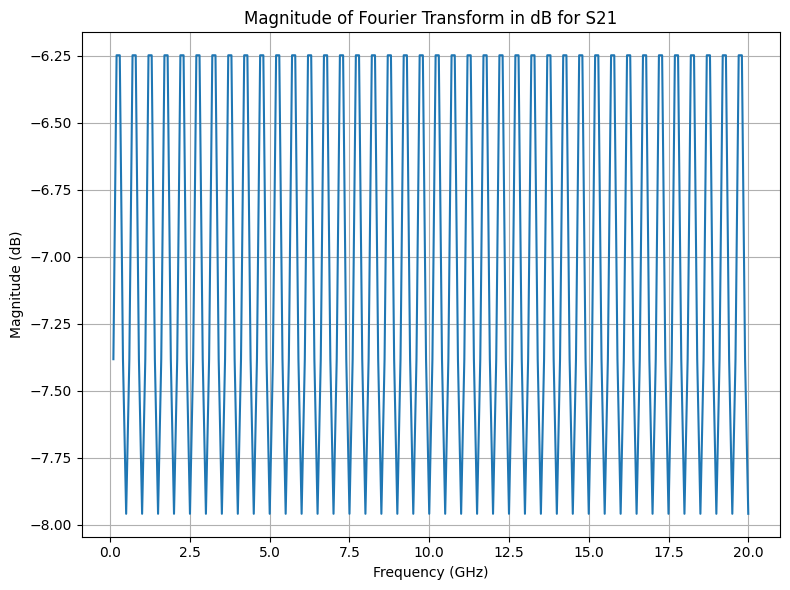

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Tp1 = 0.7e-9  # ns to seconds
Tp2 = 1.0e-9  # ns to seconds
Tp3 = 0.3e-9  # ns to seconds

# Frequency range for the Fourier transform (in Hz)
# Sweep from 100 MHz to 20 GHz with a step size of 100 MHz
frequencies = np.arange(100e6, 20e9 + 100e6, 100e6)  # 100 MHz step size

# Calculate Fourier transform as a sum of exponentials (infinite series approximation)
V_f = np.zeros_like(frequencies, dtype=complex)

# Number of terms to approximate the infinite series
N_terms = 400
term1 = 0
term2 = 0
for n in range(0,N_terms,4):
    term1 += (1/3)**n * np.exp(-1j * 2 * np.pi * frequencies * (Tp1 + Tp3 + (n + 1) * Tp2)) + (1/3)**(n+1) * np.exp(-1j * 2 * np.pi * frequencies * (Tp1 + Tp3 + (n + 1) * Tp2))

for n in range(2,N_terms,4):
    term2 += (1/3)**n * np.exp(-1j * 2 * np.pi * frequencies * (Tp1 + Tp3 + (n + 1) * Tp2)) + (1/3)**(n+1) * np.exp(-1j * 2 * np.pi * frequencies * (Tp1 + Tp3 + (n + 1) * Tp2))


V_f = (1/6) * (term1 - term2)



# Convert magnitude to dB scale
V_f_magnitude_dB = 20 * np.log10(np.abs(V_f)*2)  #scale Vf by 2 because launch = 1/2 impulse

# Plot magnitude in dB scale
plt.figure(figsize=(8, 6))
plt.plot(frequencies / 1e9, V_f_magnitude_dB)  # Convert frequencies to GHz for better readability
plt.title('Magnitude of Fourier Transform in dB for S21')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.tight_layout()
plt.show()


S11

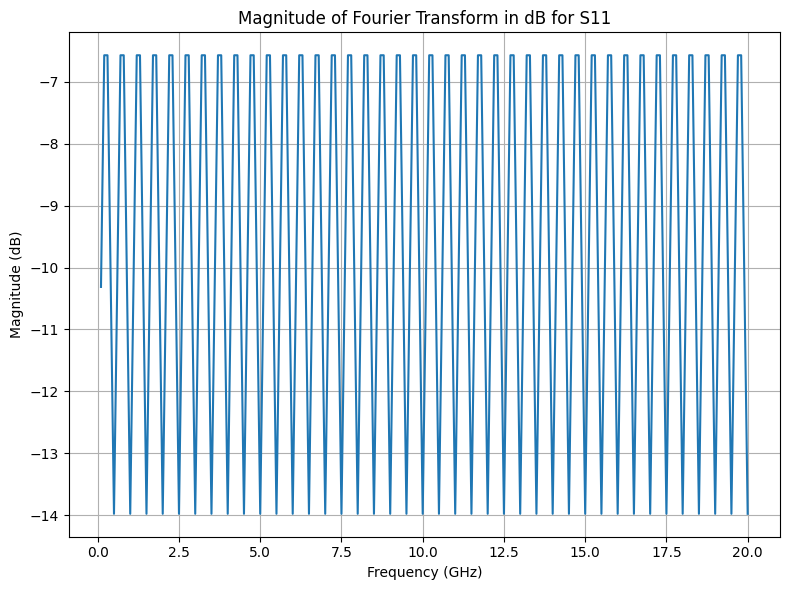

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Tp1 = 0.7e-9  # ns to seconds
Tp2 = 1.0e-9  # ns to seconds

# Frequency range for the Fourier transform (in Hz)
# Sweep from 100 MHz to 20 GHz with a step size of 100 MHz
frequencies = np.arange(100e6, 20e9 + 100e6, 100e6)  # 100 MHz step size

# Initialize the Fourier transform as a zero array
V_f = np.zeros_like(frequencies, dtype=complex)

# Calculate Fourier transform for the first 400 terms of the series
for n in range(0, 400, 2):  # n = 0, 2, 4, ..., 398
    coeff = (1 / 3**(n+1) - 1 / 3**(n+2)) * (1 / 3)

    # Alternate sign: Positive for n = 0, 4, 8,... and Negative for n = 2, 6, 10,...
    if (n // 2) % 2 == 1:  # If the division of n by 4 is odd, make it negative
        coeff = -coeff

    # Time shift using even multiples of Tp2
    time_shift = 2 * Tp1 + (n + 2) * Tp2  # Corrected time shift: multiples of 2*Tp2

    # Add the current term to the Fourier series
    V_f += coeff * np.exp(-1j * 2 * np.pi * frequencies * time_shift)

V_f += -(1/6) * np.exp(-1j * 2 * np.pi * frequencies * (2 * Tp1))
# Convert magnitude to dB scale
V_f_magnitude_dB = 20 * np.log10(np.abs(V_f)*2)

# Plot magnitude in dB scale
plt.figure(figsize=(8, 6))
plt.plot(frequencies / 1e9, V_f_magnitude_dB)  # Convert frequencies to GHz for better readability
plt.title('Magnitude of Fourier Transform in dB for S11')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.tight_layout()
plt.show()


S12

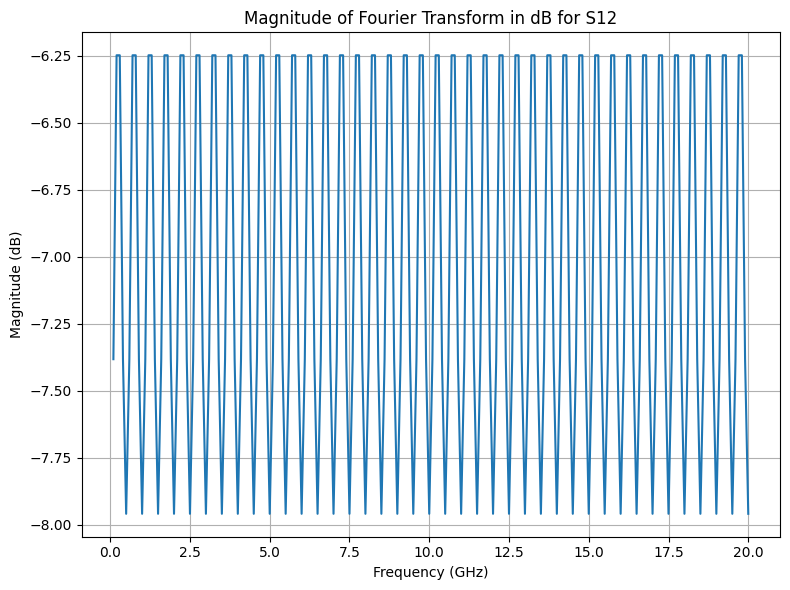

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Tp1 = 0.7e-9  # ns to seconds
Tp2 = 1.0e-9  # ns to seconds
Tp3 = 0.3e-9  # ns to seconds

# Frequency range for the Fourier transform (in Hz)
# Sweep from 100 MHz to 20 GHz with a step size of 100 MHz
frequencies = np.arange(100e6, 20e9 + 100e6, 100e6)  # 100 MHz step size

# Initialize the Fourier transform as a zero array
V_f = np.zeros_like(frequencies, dtype=complex)

# Calculate Fourier transform for the first 400 terms of the series
for n in range(0, 400, 2):  # n = 0, 2, 4, ..., 398
    coeff = (1 / 3**n - 1 / 3**(n+1)) * (1 / 3)

    # Alternating sign: Positive for n = 0, 4, 8,... and Negative for n = 2, 6, 10,...
    if (n // 2) % 2 == 1:  # If the division of n by 4 is odd, make it negative
        coeff = -coeff

    # Time shift: Tp3 + Tp1 + odd multiples of Tp2
    time_shift = Tp3 + Tp1 + (n + 1) * Tp2  # Odd multiples of Tp2

    # Add the current term to the Fourier series
    V_f += coeff * np.exp(-1j * 2 * np.pi * frequencies * time_shift)

# Convert magnitude to dB scale
V_f_magnitude_dB = 20 * np.log10(np.abs(V_f)*2)

# Plot magnitude in dB scale
plt.figure(figsize=(8, 6))
plt.plot(frequencies / 1e9, V_f_magnitude_dB)  # Convert frequencies to GHz for better readability
plt.title('Magnitude of Fourier Transform in dB for S12')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.tight_layout()
plt.show()


S22

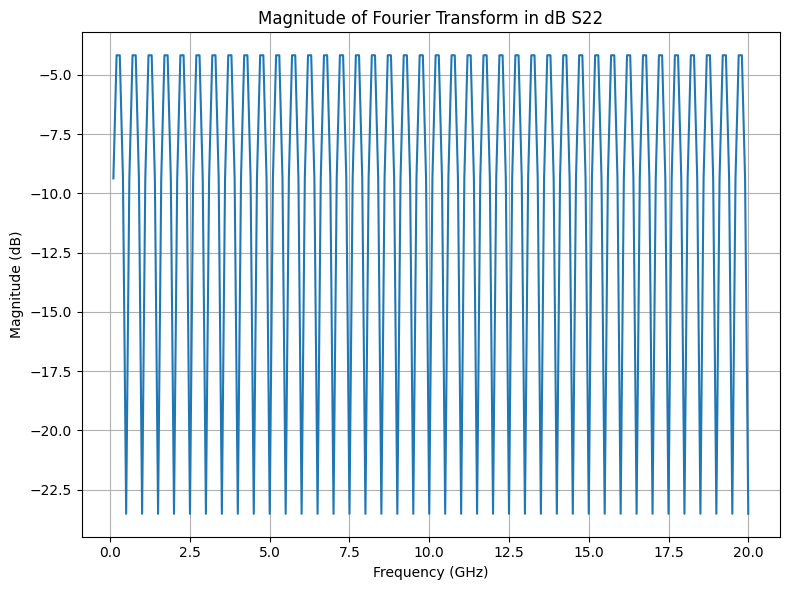

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Tp2 = 1.0e-9  # ns to seconds
Tp3 = 0.3e-9  # ns to seconds

# Frequency range for the Fourier transform (in Hz)
# Sweep from 100 MHz to 20 GHz with a step size of 100 MHz
frequencies = np.arange(100e6, 20e9 + 100e6, 100e6)  # 100 MHz step size

# Initialize the Fourier transform as a zero array
V_f = np.zeros_like(frequencies, dtype=complex)

# Calculate Fourier transform for the first 400 terms of the series
for n in range(1, 400, 2):  # n = 1, 3, 5, ..., 399 (skip by 2)
    # Coefficient: (1/3^n + 1/3^(n+1)) * 1/3
    coeff = (1 / 3**n + 1 / 3**(n+1)) * (1 / 3)

    # Alternate sign: Negative for n = 1, 5, 9,... and Positive for n = 3, 7, 11,...
    if (n // 2) % 2 == 0:  # Negative sign for every second term
        coeff = -coeff

    # Time shift: 2Tp3 + even multiples of 2Tp2
    time_shift = 2 * Tp3 + (n + 1) * Tp2  # Time shift: 2Tp3 + 2n*Tp2

    # Add the current term to the Fourier series
    V_f += coeff * np.exp(-1j * 2 * np.pi * frequencies * time_shift)

V_f += (1/6) * np.exp(-1j * 2 * np.pi * frequencies * (2 * Tp3))
# Convert magnitude to dB scale
V_f_magnitude_dB = 20 * np.log10(np.abs(V_f)*2)

# Plot magnitude in dB scale
plt.figure(figsize=(8, 6))
plt.plot(frequencies / 1e9, V_f_magnitude_dB)  # Convert frequencies to GHz for better readability
plt.title('Magnitude of Fourier Transform in dB S22')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.tight_layout()
plt.show()


Convolving with unit step

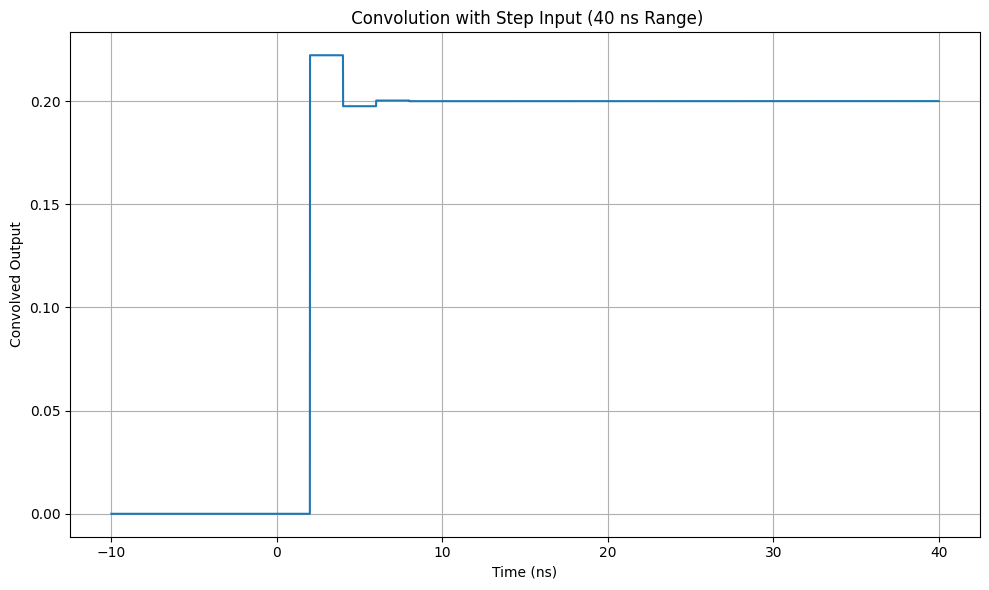

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Tp1 = 0.7e-9  # seconds
Tp2 = 1.0e-9  # seconds
Tp3 = 0.3e-9  # seconds

# Time range (in seconds) from -10 ns to 40 ns
t = np.linspace(-10e-9, 40e-9, 10000)

# Initialize the convolution result (zero array)
convolved = np.zeros_like(t)

# Step input function u(t)
def step_function(t):
    return np.heaviside(t, 1)

# Number of terms in the series (for accuracy)
N_terms = 400

# Initialize the series terms
term1 = np.zeros_like(t)
term2 = np.zeros_like(t)

# Time series loop (with blocks of four)
for n in range(0, N_terms, 4):
    # Calculate shifts and powers for term1
    shift1 = Tp1 + Tp3 + (n + 1) * Tp2
    shift2 = (Tp1 + Tp3 + (n + 1) * Tp2)
    power1 = (1/3)**n
    power2= (1/3)**(n + 1)

    # Apply to term1 with step convolution
    term1 += power1 * step_function(t - shift1) + power2 * step_function(t - shift2)

for n in range(2, N_terms, 4):
    # Calculate shifts and powers for term2
    power1 = (1/3)**n
    power2= (1/3)**(n + 1)
    shift1 = Tp1 + Tp3 + (n + 1) * Tp2
    shift2 = (Tp1 + Tp3 + (n + 1) * Tp2)

    # Apply to term2 with step convolution
    term2 += power1 * step_function(t - shift1) + power2 * step_function(t - shift2)

# The final time series
convolved = (1/6) * (term1 - term2)

# Plot the result
plt.figure(figsize=(10, 6))
plt.plot(t * 1e9, convolved)  # Convert time to ns for better readability
plt.title(' Convolution with Step Input (40 ns Range)')
plt.xlabel('Time (ns)')
plt.ylabel('Convolved Output')
plt.grid(True)
plt.tight_layout()
plt.show()
